# Week_3 Assignment_3: Логистическая регрессия

https://www.coursera.org/learn/vvedenie-mashinnoe-obuchenie/programming/MptFX/loghistichieskaia-rieghriessiia

Данное задание основано на материалах лекций по логистической регрессии.

#### Вы научитесь: 
- работать с логистической регрессией
- реализовывать градиентный спуск для ее настройки
- использовать регуляризацию

#### Введение
Логистическая регрессия — один из видов линейных классификаторов. Одной из ее особенностей является возможность оценивания вероятностей классов, тогда как большинство линейных классификаторов могут выдавать только номера классов. 

Логистическая регрессия использует достаточно сложный функционал качества, который не допускает записи решения в явном виде (в отличие от, например, линейной регрессии). Тем не менее, логистическую регрессию можно настраивать с помощью градиентного спуска.

Мы будем работать с выборкой, содержащей два признака. Будем считать, что ответы лежат в множестве {-1, 1}. Для настройки логистической регрессии мы будем решать следующую задачу:

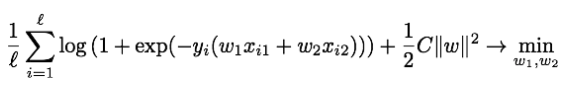

Здесь xi1 и xi2 — значение первого и второго признаков соответственно на объекте xi. В этом задании мы будем рассматривать алгоритмы без свободного члена, чтобы упростить работу.

Градиентный шаг для весов будет заключаться в одновременном обновлении весов w1 и w2 по следующим формулам (проверьте сами, что здесь действительно выписана производная нашего функционала):
   
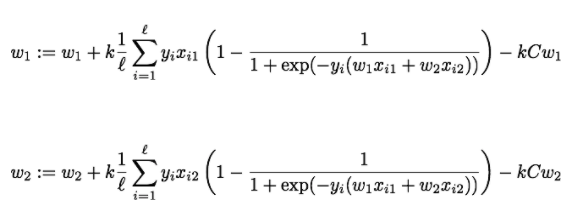

Здесь k — размер шага. 

Линейные методы могут переобучаться и давать плохое качество из-за различных проблем в данных: мультиколлинеарности, зашумленности и т.д. Чтобы избежать этого, следует использовать регуляризацию — она позволяет понизить сложность модели и не допустить переобучения. Сила регуляризации определяется коэффициентом C в формулах, указанных выше.

#### Реализация в Scikit-Learn
В этом задании мы предлагаем вам самостоятельно реализовать градиентный спуск. 

В качестве метрики качества будем использовать AUC-ROC (Area Under ROC-Curve). Она предназначена для алгоритмов бинарной классификации, выдающих оценку принадлежности объекта к одному из классов. По сути, значение этой метрики является агрегацией показателей качества всех алгоритмов, которые можно получить, выбирая какой-либо порог для оценки принадлежности.

В Scikit-Learn метрика AUC реализована функцией [sklearn.metrics.roc_auc_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html?highlight=sklearn%20metrics%20roc_auc_score). В качестве первого аргумента ей передается вектор истинных ответов, в качестве второго — вектор с оценками принадлежности объектов к первому классу.

#### Материалы
Подробнее о логистической регрессии и предсказании вероятностей с ее помощью
https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture05-linclass.pdf

Подробнее о градиентах и градиентном спуске
https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture02-linregr.pdf

#### Инструкция по выполнению
1. Загрузите данные из файла data-logistic.csv. Это двумерная выборка, целевая переменная на которой принимает значения -1 или 1.
2. Убедитесь, что выше выписаны правильные формулы для градиентного спуска. Обратите внимание, что мы используем полноценный градиентный спуск, а не его стохастический вариант!
3. Реализуйте градиентный спуск для обычной и L2-регуляризованной (с коэффициентом регуляризации 10) логистической регрессии. Используйте длину шага k=0.1. В качестве начального приближения используйте вектор (0, 0).
4. Запустите градиентный спуск и доведите до сходимости (евклидово расстояние между векторами весов на соседних итерациях должно быть не больше 1e-5). Рекомендуется ограничить сверху число итераций десятью тысячами.
5. Какое значение принимает AUC-ROC на обучении без регуляризации и при ее использовании? Эти величины будут ответом на задание. В качестве ответа приведите два числа через пробел. Обратите внимание, что на вход функции roc_auc_score нужно подавать оценки вероятностей, подсчитанные обученным алгоритмом. Для этого воспользуйтесь сигмоидной функцией: a(x) = 1 / (1 + exp(-w1 x1 - w2 x2)). 
6. Попробуйте поменять длину шага. Будет ли сходиться алгоритм, если делать более длинные шаги? Как меняется число итераций при уменьшении длины шага?
7. Попробуйте менять начальное приближение. Влияет ли оно на что-нибудь?

Если ответом является нецелое число, то целую и дробную часть необходимо разграничивать точкой, например, 0.421. При необходимости округляйте дробную часть до трех знаков.

## Ответы на вопросы задания

### 1. Загрузите данные из файла data-logistic.csv

In [1]:
import pandas as pd
import numpy as np

In [13]:
path = 'Data_W1-W6/data-logistic.csv'
data = pd.read_csv(path, names=['label', 'x1', 'x2'])
data.head()

,label,x1,x2
0,-1,-0.663827,-0.138526
1,1,1.994596,2.468025
2,-1,-1.247395,0.749425
3,1,2.309374,1.899836
4,1,0.849143,2.407750


In [14]:
data.shape

(205, 3)

### 2. Убедитесь, что выше выписаны правильные формулы для градиентного спуска

### 3. Реализуйте градиентный спуск для обычной и L2-регуляризованной логистической регрессии

In [ ]:
C = 10
k = 0.1
w = [0, 0]

### 4. Запустите градиентный спуск и доведите до сходимости

### 5. Какое значение принимает AUC-ROC на обучении без регуляризации и при ее использовании?

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

### 6. Попробуйте поменять длину шага. Будет ли сходиться алгоритм, если делать более длинные шаги? Как меняется число итераций при уменьшении длины шага?

### 7. Попробуйте менять начальное приближение. Влияет ли оно на что-нибудь?